In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('Set_datos_T1_completo.csv')
df_csv

formacion_academica  estrato_socioeconomico    sexo  edad  \
0                    2.5                     1.2   Mujer    36   
1                    4.5                     3.0   Mujer    28   
2                    3.9                     3.1   Mujer    54   
3                    3.1                     3.0  Hombre    42   
4                    4.2                     3.0  Hombre    29   
..                   ...                     ...     ...   ...   
995                  2.0                     4.2  Hombre    59   
996                  2.4                     1.5  Hombre    21   
997                  4.4                     5.0  Hombre    23   
998                  3.8                     3.5   Mujer    32   
999                  4.2                     5.0   Mujer    43   

     desempeno_neurocognitivo  duracion_sueno  consumo_cafe   fc_antes  \
0                         2.8               1             2  87.483571   
1                         2.1               4             3  84.308678   
2                         2.8               4             2  88.238443   
3                         4.0               4             4  92.615149   
4                         3.6               2             4  83.829233   
..                        ...             ...           ...        ...   
995                       3.0               4             4  83.594499   
996                       1.6               3             2  93.988433   
997                       4.0               3             4  88.204214   
998                       1.8               4             1  82.144105   
999                       2.0               3             3  87.862914   

     fc_despues   fr_antes  fr_despues   pas_antes  pad_antes  pas_despues  \
0     79.684860  14.649643   14.557451  109.429593  78.925925   104.495644   
1     77.459411  15.710963   14.571348  111.845346  66.111595   107.852646   
2     83.119182  14.415160   12.828766  110.289699  78.573728   105.634449   
3     88.909023  15.384077   11.496389  112.260021  73.831380   105.830557   
4     77.432786  12.212771    9.656218  113.929248  78.537289   106.373535   
..          ...        ...         ...         ...        ...          ...   
995   76.454198  16.154961   14.126503  113.510666  86.049278   108.307406   
996   89.041475  16.515505   16.593317  118.845158  76.634973   111.510723   
997   84.967964  13.516479   11.836777  112.363055  70.824377   104.186160   
998   77.470239  16.668353   13.024975  114.974467  83.264565   111.344441   
999   84.352719  15.689482   13.328834  116.993819  85.388888   110.391455   

     pad_despues  
0      75.160523  
1      62.038182  
2      75.075038  
3      72.773877  
4      75.692711  
..           ...  
995    81.748176  
996    75.633318  
997    68.529694  
998    79.768800  
999    81.744499  

[1000 rows x 15 columns]

## **<span style="color:#1a73e8;">PRUEBAS DE UNA SOLA MUESTRA</span>**


Variable: fc_antes  (n = 1000)

--- Prueba de normalidad (Shapiro-Wilk) ---
H0: Los datos provienen de una distribuci√≥n normal.
H1: Los datos NO provienen de una distribuci√≥n normal.
Estad√≠stico W=0.9986, p=0.6266
Resultado: No se rechaza H0 ‚Üí los datos pueden considerarse normales.


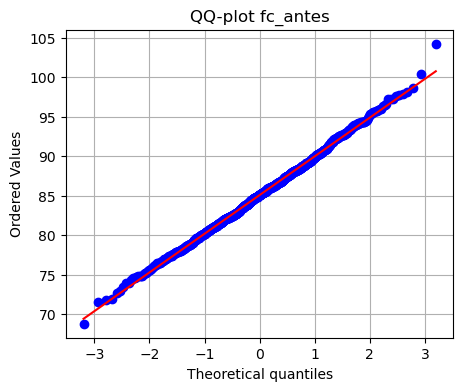

In [3]:
col = "fc_antes"   # columna para prueba de una muestra
mu_0 = 80           # media poblacional hipot√©tica

# ----------------------------
# PRUEBA DE NORMALIDAD
# ----------------------------
x = df_csv[col].dropna().astype(float)
n = len(x)
print(f"\nVariable: {col}  (n = {n})")

# Hip√≥tesis de normalidad
print("\n--- Prueba de normalidad (Shapiro-Wilk) ---")
print("H0: Los datos provienen de una distribuci√≥n normal.")
print("H1: Los datos NO provienen de una distribuci√≥n normal.")

sh_stat, sh_p = stats.shapiro(x)
print(f"Estad√≠stico W={sh_stat:.4f}, p={sh_p:.4f}")
if sh_p > 0.05:
    print("Resultado: No se rechaza H0 ‚Üí los datos pueden considerarse normales.")
else:
    print("Resultado: Se rechaza H0 ‚Üí los datos NO siguen una distribuci√≥n normal.")

# QQ-plot para ver gr√°ficamente la normalidad
plt.figure(figsize=(5,4))
stats.probplot(x, dist="norm", plot=plt)
plt.title(f"QQ-plot {col}")
plt.grid(True)
plt.show()


In [4]:
# ----------------------------
# PRUEBA T DE UNA MUESTRA
# ----------------------------
print("\n--- Prueba t de una muestra ---")
print(f"H0: Œº = {mu_0} (la media muestral no difiere de la media poblacional)")
print(f"H1: Œº ‚â† {mu_0} (la media muestral difiere significativamente de la media poblacional)")

mean_x = x.mean()
s = x.std(ddof=1)

# Forma manual
t_stat_manual = (mean_x - mu_0) / (s / np.sqrt(n))
p_manual = 2 * (1 - stats.t.cdf(abs(t_stat_manual), df=n-1))
print(f"\n[Manual] t={t_stat_manual:.3f}, p={p_manual:.4f}, media={mean_x:.2f}, s={s:.2f}")

# Con scipy
t_stat_scipy, p_scipy = stats.ttest_1samp(x, popmean=mu_0, nan_policy='omit')
print(f"[SciPy]  t={t_stat_scipy:.3f}, p={p_scipy:.4f}")

if p_scipy < 0.05:
    print("Resultado: Se rechaza H0 ‚Üí la media difiere significativamente de Œº‚ÇÄ.")
else:
    print("Resultado: No se rechaza H0 ‚Üí la media no difiere de Œº‚ÇÄ.")



--- Prueba t de una muestra ---
H0: Œº = 80 (la media muestral no difiere de la media poblacional)
H1: Œº ‚â† 80 (la media muestral difiere significativamente de la media poblacional)

[Manual] t=32.918, p=0.0000, media=85.10, s=4.90
[SciPy]  t=32.918, p=0.0000
Resultado: Se rechaza H0 ‚Üí la media difiere significativamente de Œº‚ÇÄ.


In [6]:
# ----------------------------
# ALTERNATIVA NO PARAM√âTRICA (Wilcoxon)
# ----------------------------
if sh_p <= 0.05 and n < 30:
    print("\n--- Prueba Wilcoxon (no param√©trica, una muestra) ---")
    print(f"H0: mediana = {mu_0}")
    print(f"H1: mediana ‚â† {mu_0}")
    stat_w, p_w = stats.wilcoxon(x - mu_0)
    print(f"Wilcoxon: stat={stat_w:.3f}, p={p_w:.4f}")
    if p_w < 0.05:
        print("Resultado: Se rechaza H0 ‚Üí la mediana difiere significativamente de Œº‚ÇÄ.")
    else:
        print("Resultado: No se rechaza H0 ‚Üí la mediana no difiere de Œº‚ÇÄ.")
else:
    print("\nNo se realiz√≥ Wilcoxon (normalidad o n grande).")


No se realiz√≥ Wilcoxon (normalidad o n grande).


## **<span style="color:#1a73e8;">PRUEBAS DE DOS GRUPOS</span>**

### **<span style="color:#1a73e8;">PRUEBA T PAREADA</span>**

In [7]:
# ----------------------------
# PRUEBA T PAREADA (antes vs despu√©s)
# ----------------------------
col1 = "fc_antes"
col2 = "fc_despues"

pairs = pd.concat([df_csv[col1], df_csv[col2]], axis=1).dropna()
x1 = pairs[col1].astype(float)
x2 = pairs[col2].astype(float)
diff = x2 - x1
n_pairs = len(diff)

print(f"\n--- Prueba t pareada: {col1} vs {col2} ---")
print(f"H0: Œº_dif = 0 (no hay cambio entre antes y despu√©s)")
print(f"H1: Œº_dif ‚â† 0 (s√≠ hay cambio entre antes y despu√©s)")

# Normalidad de las diferencias
sh_d_stat, sh_d_p = stats.shapiro(diff)
print(f"\nNormalidad de las diferencias: W={sh_d_stat:.4f}, p={sh_d_p:.4f}")

# t pareada
t_pareada_stat, p_pareada = stats.ttest_rel(x2, x1, nan_policy='omit')
print(f"t pareada (scipy): t={t_pareada_stat:.3f}, p={p_pareada:.4f}")

if p_pareada < 0.05:
    print("Resultado: Se rechaza H0 ‚Üí hay diferencia significativa entre antes y despu√©s.")
else:
    print("Resultado: No se rechaza H0 ‚Üí no hay cambio significativo.")

# Wilcoxon pareado si no hay normalidad
if sh_d_p <= 0.05 and n_pairs < 30:
    print("\n--- Prueba Wilcoxon pareada ---")
    print("H0: mediana de las diferencias = 0")
    print("H1: mediana de las diferencias ‚â† 0")
    stat_w_p, p_w_p = stats.wilcoxon(x2 - x1)
    print(f"Wilcoxon pareado: stat={stat_w_p:.3f}, p={p_w_p:.4f}")
    if p_w_p < 0.05:
        print("Resultado: Se rechaza H0 ‚Üí hay cambio significativo en la mediana.")
    else:
        print("Resultado: No se rechaza H0 ‚Üí no hay cambio significativo.")
else:
    print("\nNo se realiz√≥ Wilcoxon pareado (diferencias normales o n grande).")


--- Prueba t pareada: fc_antes vs fc_despues ---
H0: Œº_dif = 0 (no hay cambio entre antes y despu√©s)
H1: Œº_dif ‚â† 0 (s√≠ hay cambio entre antes y despu√©s)

Normalidad de las diferencias: W=0.9988, p=0.7309
t pareada (scipy): t=-81.504, p=0.0000
Resultado: Se rechaza H0 ‚Üí hay diferencia significativa entre antes y despu√©s.

No se realiz√≥ Wilcoxon pareado (diferencias normales o n grande).


### **<span style="color:#1a73e8;">PRUEBA T - GRUPOS INDEPENDIENTES</span>**

In [8]:
def boxplot_by_group(df, quantitative_col, categorical_col):
    """
    Crea un boxplot por grupo usando Plotly.

    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame que contiene las variables.
    quantitative_col : str
        Nombre de la columna cuantitativa (num√©rica).
    categorical_col : str
        Nombre de la columna cualitativa (categ√≥rica).
    title : str
        T√≠tulo del gr√°fico.

    Retorna:
    --------
    fig : plotly.graph_objects.Figure
        Objeto figura interactiva.
    """
    fig = px.box(
        df,
        x=categorical_col,
        y=quantitative_col,
        color=categorical_col,
        title='Boxplot por grupo',
        points="outliers",  # muestra los puntos outliers
        template="plotly_white"
    )

    fig.update_layout(
        xaxis_title=categorical_col,
        yaxis_title=quantitative_col,
        font=dict(size=14),
        title_font_size=16
    )

    fig.show()

In [9]:
boxplot_by_group(df_csv, 'pad_antes', 'sexo')

In [10]:
# 1. Agrupar por sexo
grupo_m = df_csv[df_csv['sexo'] == 'Mujer']['pad_antes'].dropna()
grupo_h = df_csv[df_csv['sexo'] == 'Hombre']['pad_antes'].dropna()

# 4. Normalidad por grupo: Shapiro-Wilk
shapiro_m = stats.shapiro(grupo_m)
shapiro_f = stats.shapiro(grupo_h)

# 2. Pruebas de normalidad
# Shapiro-Wilk
shapiro_m = stats.shapiro(grupo_m)
shapiro_h = stats.shapiro(grupo_h)

print("\n--- Prueba de Normalidad: Shapiro-Wilk ---")
print(f"Mujeres: estad√≠stico={shapiro_m.statistic:.4f}, p-valor={shapiro_m.pvalue:.4f}")
if shapiro_m.pvalue > 0.05:
    print("‚Üí No se rechaza la hip√≥tesis nula: los datos de mujeres tienen distribuci√≥n normal.")
else:
    print("‚Üí Se rechaza la hip√≥tesis nula: los datos de mujeres NO tienen distribuci√≥n normal.")

print(f"Hombres: estad√≠stico={shapiro_h.statistic:.4f}, p-valor={shapiro_h.pvalue:.4f}")
if shapiro_h.pvalue > 0.05:
    print("‚Üí No se rechaza la hip√≥tesis nula: los datos de hombres tienen distribuci√≥n normal.")
else:
    print("‚Üí Se rechaza la hip√≥tesis nula: los datos de hombres NO tienen distribuci√≥n normal.")

# Kolmogorov-Smirnov (contra distribuci√≥n normal te√≥rica)
ks_m = stats.kstest(grupo_m, 'norm', args=(grupo_m.mean(), grupo_m.std()))
ks_h = stats.kstest(grupo_h, 'norm', args=(grupo_h.mean(), grupo_h.std()))

print("\n--- Prueba de Normalidad: Kolmogorov-Smirnov ---")
print(f"Mujeres: estad√≠stico={ks_m.statistic:.4f}, p-valor={ks_m.pvalue:.4f}")
if ks_m.pvalue > 0.05:
    print("‚Üí No se rechaza la hip√≥tesis nula: los datos de mujeres se ajustan a una distribuci√≥n normal.")
else:
    print("‚Üí Se rechaza la hip√≥tesis nula: los datos de mujeres NO se ajustan a una distribuci√≥n normal.")

print(f"Hombres: estad√≠stico={ks_h.statistic:.4f}, p-valor={ks_h.pvalue:.4f}")
if ks_h.pvalue > 0.05:
    print("‚Üí No se rechaza la hip√≥tesis nula: los datos de hombres se ajustan a una distribuci√≥n normal.")
else:
    print("‚Üí Se rechaza la hip√≥tesis nula: los datos de hombres NO se ajustan a una distribuci√≥n normal.")

# 3. Homogeneidad de varianzas: prueba de Levene
levene_test = stats.levene(grupo_m, grupo_h)
print("\n--- Prueba de Homogeneidad de Varianzas: Levene ---")
print(f"Estad√≠stico={levene_test.statistic:.4f}, p-valor={levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("‚Üí No se rechaza la hip√≥tesis nula: las varianzas son iguales (homocedasticidad).")
else:
    print("‚Üí Se rechaza la hip√≥tesis nula: las varianzas son diferentes (heterocedasticidad).")

# 4. T-test para muestras independientes
ttest = stats.ttest_ind(grupo_m, grupo_h)

print("\n--- Prueba T para muestras independientes ---")
print(f"Estad√≠stico t={ttest.statistic:.4f}, p-valor={ttest.pvalue:.4f}")
if ttest.pvalue < 0.05:
    print("‚Üí Se rechaza la hip√≥tesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("‚Üí No se rechaza la hip√≥tesis nula: NO hay diferencia significativa entre los grupos.")


--- Prueba de Normalidad: Shapiro-Wilk ---
Mujeres: estad√≠stico=0.9942, p-valor=0.0488
‚Üí Se rechaza la hip√≥tesis nula: los datos de mujeres NO tienen distribuci√≥n normal.
Hombres: estad√≠stico=0.9960, p-valor=0.2685
‚Üí No se rechaza la hip√≥tesis nula: los datos de hombres tienen distribuci√≥n normal.

--- Prueba de Normalidad: Kolmogorov-Smirnov ---
Mujeres: estad√≠stico=0.0351, p-valor=0.5369
‚Üí No se rechaza la hip√≥tesis nula: los datos de mujeres se ajustan a una distribuci√≥n normal.
Hombres: estad√≠stico=0.0278, p-valor=0.8358
‚Üí No se rechaza la hip√≥tesis nula: los datos de hombres se ajustan a una distribuci√≥n normal.

--- Prueba de Homogeneidad de Varianzas: Levene ---
Estad√≠stico=0.2851, p-valor=0.5935
‚Üí No se rechaza la hip√≥tesis nula: las varianzas son iguales (homocedasticidad).

--- Prueba T para muestras independientes ---
Estad√≠stico t=3.4645, p-valor=0.0006
‚Üí Se rechaza la hip√≥tesis nula: hay una diferencia significativa entre los grupos.


## **<span style="color:#1a73e8;">PRUEBAS DE TRES O M√ÅS GRUPOS</span>**

### **<span style="color:#1a73e8;">DATOS INDEPENDIENTES - ANOVA</span>**

In [11]:
boxplot_by_group(df_csv, 'fc_antes', 'consumo_cafe')

In [12]:
# 1. Agrupar por consumo_cafe
grupo_1 = df_csv[df_csv['consumo_cafe'] == 1]['fc_antes'].dropna()
grupo_2 = df_csv[df_csv['consumo_cafe'] == 2]['fc_antes'].dropna()
grupo_3 = df_csv[df_csv['consumo_cafe'] == 3]['fc_antes'].dropna()
grupo_4 = df_csv[df_csv['consumo_cafe'] == 4]['fc_antes'].dropna()


# 3. Crear modelo ANOVA (One-way)
modelo = ols('fc_antes ~ C(consumo_cafe)', data=df_csv).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("\n--- Resultado del ANOVA de una v√≠a ---")
print(anova)

# 4. Supuesto de normalidad de los residuos
residuos = modelo.resid
shapiro_test = stats.shapiro(residuos)
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estad√≠stico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("‚Üí Los residuos siguen una distribuci√≥n normal (no se rechaza H‚ÇÄ).")
else:
    print("‚Üí Los residuos no siguen una distribuci√≥n normal (se rechaza H‚ÇÄ).")

# 5. Supuesto de homogeneidad de varianzas (Levene)
levene = stats.levene(grupo_1, grupo_2, grupo_3, grupo_4)
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estad√≠stico={levene.statistic:.4f}, p-valor={levene.pvalue:.4f}")
if levene.pvalue > 0.05:
    print("‚Üí Se asume homogeneidad de varianzas (no se rechaza H‚ÇÄ).")
else:
    print("‚Üí No hay homogeneidad de varianzas (se rechaza H‚ÇÄ).")

# 6. Interpretaci√≥n del ANOVA
p_anova = anova["PR(>F)"].iloc[0]
print("\n--- Conclusi√≥n ---")
if p_anova < 0.05:
    print(f"p-valor={p_anova:.4f} ‚Üí Se rechaza la hip√≥tesis nula.")
    print("‚Üí Existen diferencias significativas en la frecuencia card√≠aca entre los niveles de consumo de caf√©.")
else:
    print(f"p-valor={p_anova:.4f} ‚Üí No se rechaza la hip√≥tesis nula.")
    print("‚Üí No se encontraron diferencias significativas entre los grupos de consumo de caf√©.")



--- Resultado del ANOVA de una v√≠a ---
                       sum_sq     df         F    PR(>F)
C(consumo_cafe)      9.340698    3.0  0.129546  0.942555
Residual         23938.284045  996.0       NaN       NaN

--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estad√≠stico=0.9986, p-valor=0.6292
‚Üí Los residuos siguen una distribuci√≥n normal (no se rechaza H‚ÇÄ).

--- Prueba de homogeneidad de varianzas (Levene) ---
Estad√≠stico=1.3837, p-valor=0.2463
‚Üí Se asume homogeneidad de varianzas (no se rechaza H‚ÇÄ).

--- Conclusi√≥n ---
p-valor=0.9426 ‚Üí No se rechaza la hip√≥tesis nula.
‚Üí No se encontraron diferencias significativas entre los grupos de consumo de caf√©.


Valores √∫nicos en 'genero': ['Mujer' 'Hombre']
Valores √∫nicos en 'consumo_cafe': [2 3 4 1]

--- Resultado del ANOVA de dos v√≠as ---
                               sum_sq     df         F    PR(>F)
C(sexo)                      1.071463    1.0  0.044405  0.833146
C(consumo_cafe)              9.222374    3.0  0.127401  0.943870
C(sexo):C(consumo_cafe)      0.782849    3.0  0.010815  0.998460
Residual                 23936.429733  992.0       NaN       NaN

--- Hip√≥tesis ---
H0‚ÇÅ: No hay efecto del g√©nero sobre la frecuencia card√≠aca.
H0‚ÇÇ: No hay efecto del consumo de caf√© sobre la frecuencia card√≠aca.
H0‚ÇÉ: No existe interacci√≥n entre g√©nero y consumo de caf√©.
H1: Al menos uno de los factores o su interacci√≥n influye significativamente en la frecuencia card√≠aca.


--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estad√≠stico=0.9986, p-valor=0.6365
‚Üí No se rechaza H‚ÇÄ: los residuos siguen una distribuci√≥n normal.

--- Prueba de homogeneidad de varianzas (Lev

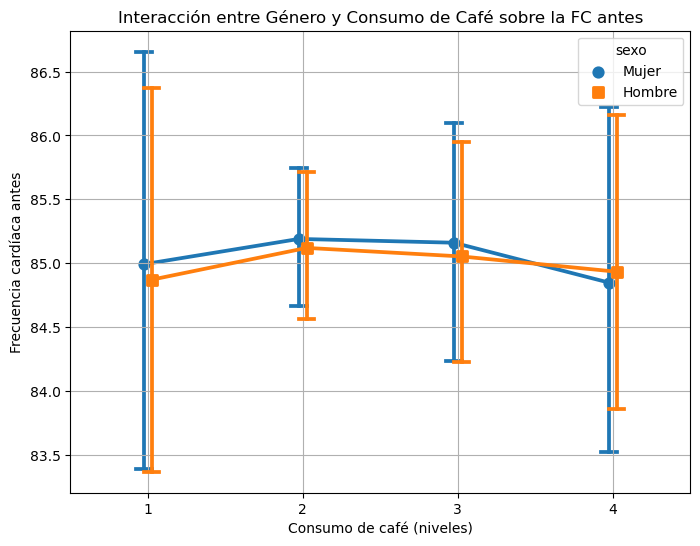

In [13]:
# ---------------------------------------------------
# ANOVA DE DOS V√çAS: efecto de genero y consumo de caf√© sobre fc_antes
# ---------------------------------------------------


# Verificar valores √∫nicos
print("Valores √∫nicos en 'genero':", df_csv['sexo'].unique())
print("Valores √∫nicos en 'consumo_cafe':", df_csv['consumo_cafe'].unique())

# ---------------------------------------------------
# 1. Definir modelo ANOVA de dos v√≠as con interacci√≥n
# ---------------------------------------------------
# Efectos principales + interacci√≥n
modelo_2way = ols('fc_antes ~ C(sexo) * C(consumo_cafe)', data=df_csv).fit()
anova_2way = sm.stats.anova_lm(modelo_2way, typ=2)

print("\n--- Resultado del ANOVA de dos v√≠as ---")
print(anova_2way)

# ---------------------------------------------------
# 2. Hip√≥tesis planteadas
# ---------------------------------------------------
print("""
--- Hip√≥tesis ---
H0‚ÇÅ: No hay efecto del g√©nero sobre la frecuencia card√≠aca.
H0‚ÇÇ: No hay efecto del consumo de caf√© sobre la frecuencia card√≠aca.
H0‚ÇÉ: No existe interacci√≥n entre g√©nero y consumo de caf√©.
H1: Al menos uno de los factores o su interacci√≥n influye significativamente en la frecuencia card√≠aca.
""")


# ---------------------------------------------------
# 3. Supuestos del ANOVA
# ---------------------------------------------------

# a) Normalidad de los residuos
residuos = modelo_2way.resid
shapiro_test = stats.shapiro(residuos)
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estad√≠stico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("‚Üí No se rechaza H‚ÇÄ: los residuos siguen una distribuci√≥n normal.")
else:
    print("‚Üí Se rechaza H‚ÇÄ: los residuos no son normales.")

# b) Homogeneidad de varianzas (Levene)
grupos = [g["fc_antes"].dropna() for _, g in df_csv.groupby(["sexo", "consumo_cafe"])]
levene = stats.levene(*grupos)
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estad√≠stico={levene.statistic:.4f}, p-valor={levene.pvalue:.4f}")
if levene.pvalue > 0.05:
    print("‚Üí No se rechaza H‚ÇÄ: se asume homogeneidad de varianzas.")
else:
    print("‚Üí Se rechaza H‚ÇÄ: no hay homogeneidad de varianzas (cuidado con el supuesto).")


# ---------------------------------------------------
# 4. Interpretaci√≥n de los resultados del ANOVA
# ---------------------------------------------------
print("\n--- Interpretaci√≥n del ANOVA de dos v√≠as ---")

for factor in anova_2way.index[:-1]:  # excluimos 'Residual'
    p_valor = anova_2way.loc[factor, "PR(>F)"]
    if p_valor < 0.05:
        print(f"Factor '{factor}': p={p_valor:.4f} ‚Üí Se rechaza H‚ÇÄ ‚Üí efecto significativo.")
    else:
        print(f"Factor '{factor}': p={p_valor:.4f} ‚Üí No se rechaza H‚ÇÄ ‚Üí sin efecto significativo.")


# ---------------------------------------------------
# 5. Visualizaci√≥n 
# ---------------------------------------------------
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(
    data=df_csv,
    x="consumo_cafe",
    y="fc_antes",
    hue="sexo",
    dodge=True,
    markers=["o", "s"],
    capsize=.1
)
plt.title("Interacci√≥n entre G√©nero y Consumo de Caf√© sobre la FC antes")
plt.xlabel("Consumo de caf√© (niveles)")
plt.ylabel("Frecuencia card√≠aca antes")
plt.grid(True)
plt.show()

### ***Conceptos***

### üß© Intervalo de Confianza

El **intervalo de confianza (IC)** es un rango de valores que se calcula a partir de los datos de una muestra y que **estima con cierto nivel de confianza** (por ejemplo, 95%) el valor real del par√°metro en la poblaci√≥n.

En otras palabras, el IC nos indica **qu√© tan seguros estamos** de que la media o el par√°metro verdadero se encuentre dentro de ese rango.

- Un **IC estrecho** significa que la estimaci√≥n es **precisa** (los datos son consistentes o el tama√±o de muestra es grande).  
- Un **IC amplio** indica **mayor incertidumbre** (mucha variabilidad o pocos datos).

En las gr√°ficas, los intervalos de confianza suelen representarse con **barras verticales** que se extienden hacia arriba y hacia abajo desde el promedio.  
Estas barras muestran el margen de error alrededor de la media estimada.

> üìä Ejemplo: Si el promedio de frecuencia card√≠aca antes de consumir caf√© es 80 bpm con un IC 95% [78 ‚Äì 82], podemos decir que **tenemos un 95% de confianza de que la media real** en la poblaci√≥n est√° entre **78 y 82 bpm**.


### **<span style="color:#1a73e8;">DATOS PAREADOS</span>**

In [ ]:
# ============================
# 1Ô∏è‚É£ Datos simulados
# ============================
# sujetos medidos en tres condiciones: antes, durante, despu√©s
df = pd.DataFrame({
    'sujeto': [1, 2, 3, 4, 5, 6],
    'antes': [80, 85, 90, 88, 92, 95],
    'durante': [78, 83, 87, 85, 89, 93],
    'despues': [75, 80, 85, 82, 87, 90]
})

# ============================
# 2Ô∏è‚É£ Evaluar normalidad de las diferencias pareadas
# ============================
diff1 = df['durante'] - df['antes']
diff2 = df['despues'] - df['durante']
diff3 = df['despues'] - df['antes']

print("\n--- Evaluaci√≥n de normalidad (Shapiro-Wilk) ---")
normal = True  # bandera para decidir qu√© prueba usar

for name, diff in {'durante-antes': diff1, 'despues-durante': diff2, 'despues-antes': diff3}.items():
    stat, p = stats.shapiro(diff)
    print(f"{name}: W={stat:.4f}, p={p:.4f}")
    if p <= 0.05:
        normal = False  # alguna diferencia no es normal

# ============================
# 3Ô∏è‚É£ Selecci√≥n de la prueba seg√∫n normalidad
# ============================
if normal:
    print("\n‚úÖ Todas las diferencias son normales ‚Üí usar ANOVA de medidas repetidas.")

    # Reestructurar al formato largo para ANOVA
    df_long = pd.melt(df, id_vars=['sujeto'], value_vars=['antes', 'durante', 'despues'],
                      var_name='condicion', value_name='valor')
    
    print(df_long)

    # ANOVA de medidas repetidas (param√©trica)
    anova = AnovaRM(df_long, depvar='valor', subject='sujeto', within=['condicion']).fit()
    print("\n--- ANOVA de medidas repetidas ---")
    print(anova)
    
    print("\nHip√≥tesis:")
    print("H0: las medias son iguales entre las tres condiciones.")
    print("H1: al menos una media difiere.")
else:
    print("\n‚ö†Ô∏è Alguna diferencia no es normal ‚Üí usar prueba de Friedman (no param√©trica).")

    friedman_stat, friedman_p = stats.friedmanchisquare(df['antes'], df['durante'], df['despues'])
    print("\n--- Prueba de Friedman ---")
    print(f"Estad√≠stico = {friedman_stat:.4f}, p = {friedman_p:.4f}")
    
    print("\nHip√≥tesis:")
    print("H0: las medianas son iguales entre las tres condiciones.")
    print("H1: al menos una mediana difiere.")
    
    if friedman_p < 0.05:
        print("Resultado: Se rechaza H0 ‚Üí hay diferencia significativa entre condiciones.")
    else:
        print("Resultado: No se rechaza H0 ‚Üí no hay diferencia significativa.")


--- Evaluaci√≥n de normalidad (Shapiro-Wilk) ---
durante-antes: W=0.6827, p=0.0040
despues-durante: W=0.6399, p=0.0014
despues-antes: W=0.4961, p=0.0000

‚ö†Ô∏è Alguna diferencia no es normal ‚Üí usar prueba de Friedman (no param√©trica).

--- Prueba de Friedman ---
Estad√≠stico = 12.0000, p = 0.0025

Hip√≥tesis:
H0: las medianas son iguales entre las tres condiciones.
H1: al menos una mediana difiere.
Resultado: Se rechaza H0 ‚Üí hay diferencia significativa entre condiciones.
